# Remembering how SVD works

In [25]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import svds
from sklearn.decomposition import TruncatedSVD

import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import matplotlib.pyplot as plt

In [31]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10    # Use this parameter in your call to `TruncatedSVD`
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    # ------------------
    # Write your implementation here.
    M_reduced = TruncatedSVD(n_components=k, n_iter=n_iters).fit_transform(M)
    # ------------------

    print("Done.")
    return M_reduced

def plot_matrix(M):
    plt.imshow(M, cmap='Greys')
    plt.colorbar()
    plt.show()

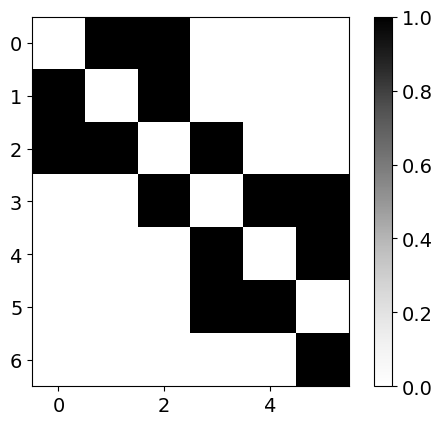

(7, 6)

In [54]:
M = np.array([[0, 1, 1, 0, 0, 0],
              [1, 0, 1, 0, 0, 0],
              [1, 1, 0, 1, 0, 0],
              [0, 0, 1, 0, 1, 1],
              [0, 0, 0, 1, 0, 1],
              [0, 0, 0, 1, 1, 0],
              [0, 0, 0, 0, 0, 1]])
plot_matrix(M)
M.shape

In [67]:
# make SVD
U, S, Vh = np.linalg.svd(M, full_matrices=False)

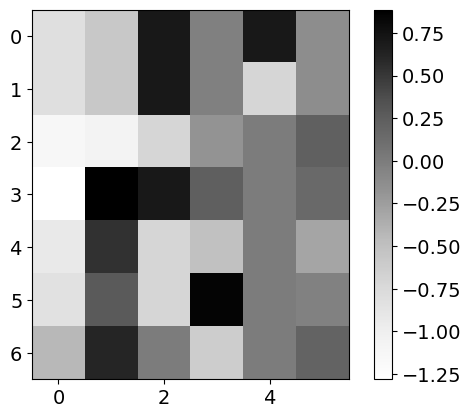

In [82]:
plot_matrix(U@np.diag(S))

Running Truncated SVD over 7 words...
Done.


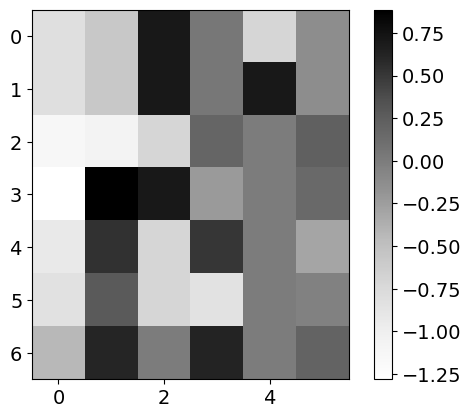

In [85]:
M_reduced = reduce_to_k_dim(M, k=6)
plot_matrix(-M_reduced)

Running Truncated SVD over 7 words...
Done.


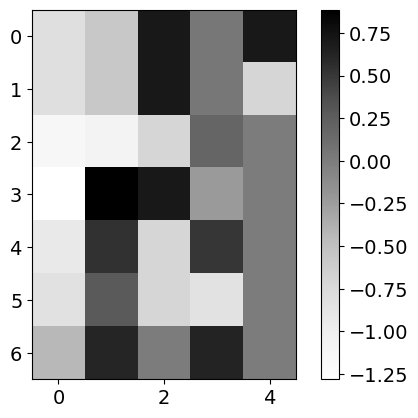

In [86]:
M_reduced = reduce_to_k_dim(M, k=5)
plot_matrix(-M_reduced)

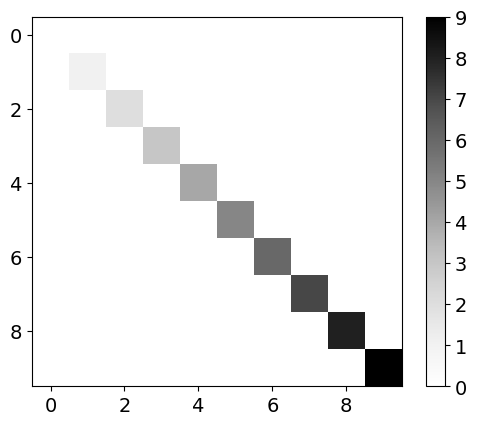

In [46]:
M = np.diag(np.arange(0, 10))
plot_matrix(M)

In [47]:
# make SVD
U, S, V = np.linalg.svd(M, full_matrices=False)

In [48]:
S

array([9., 8., 7., 6., 5., 4., 3., 2., 1., 0.])

In [29]:
M_reduced = reduce_to_k_dim(M, k=10)

Running Truncated SVD over 10 words...
Done.


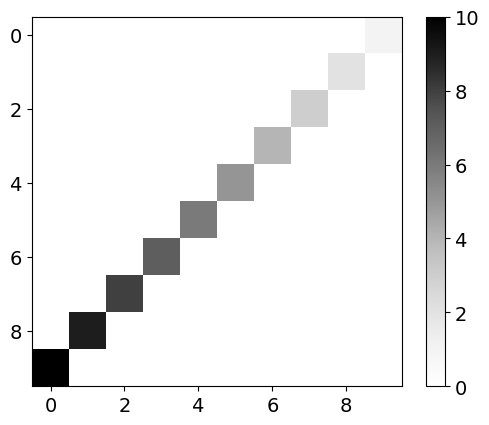

In [32]:
plot_matrix(M_reduced)

In [34]:
U@S@V.T

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])